**Pre Analysis of Data**

- Joining datasets
- Clearing empty columns
- Checking shape, non-nulls etc

In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import glob
import numpy as np 
from IPython.display import display

# create dataframe for all portal data (single csv)
df_portal = pd.read_csv("./Data/Portal_AU_NZ/Portal_AU_Data.csv")


# obtain all csv files for AU volaby data
volaby_path = glob.glob("./Data/Volaby_AU/*detailed-stats*.{}".format('csv'))

vol_df_list = []
for file in volaby_path:
    temp_df = pd.read_csv(file)
    temp_df.dropna(axis=1, how='all', inplace=True)
    vol_df_list.append(temp_df)

# concat all csv files for AU volaby data into single df
df_volaby = pd.concat(vol_df_list, ignore_index=True)


# Print basic data information for two tables
print('Portal Raw Data Overview:')
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(df_portal.head())
    df_portal.info()
    
    print('Volaby Raw Data Overview:') 
    display(df_volaby.head())
    df_volaby.info()


c:\Users\samue\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (26,30,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Portal Raw Data Overview:


,id,reference,tablet_id,tablet_ip,app_version_id,van_location_service_id,user_id,driver_id,van_id,drive_to_start,shift_start,shift_end,driver_back_id,drive_back_end,end_fuel_level,end_waste_level,end_clean_level,end_battery_level,volunteer_rating,van_rating,safety_rating,washes,showers,volunteer_hours,turned_away,referred,solar_conditions,temperature,wind_speed,humidity,weather,description,upcoming_shift_comments,next_service_comments,emails_distributed,asana_resource_id,name,name.1,name.2,name.3,address_1,address_2,address_suburb
0,38,NaN,NaN,NaN,NaN,73,NaN,237.0,6,2016-09-22 10:11:01,2016-09-22 10:11:07,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,cathy,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
1,816,NaN,12.0,NaN,NaN,73,405.0,405.0,6,2017-01-17 16:06:30,2017-01-17 16:06:32,2017-01-17 19:18:29,405.0,2017-01-17 19:18:34,100.0,0.0,100.0,NaN,5.0,5.0,5.0,5.0,NaN,8.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Had trublr eith pumping out waste tonight. Rep...,NaN,NaN,1,NaN,cathy,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
2,879,NaN,12.0,NaN,NaN,73,237.0,237.0,6,2017-01-24 16:17:01,2017-01-24 17:03:03,2017-01-24 19:09:28,237.0,2017-01-24 19:09:34,100.0,0.0,100.0,NaN,5.0,5.0,5.0,6.0,NaN,12.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I think the levels page should be completed be...,NaN,NaN,1,NaN,cathy,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
3,958,NaN,12.0,NaN,NaN,73,405.0,405.0,6,2017-01-31 15:59:28,2017-01-31 16:46:44,2017-01-31 19:27:59,405.0,2017-01-31 19:28:01,100.0,0.0,100.0,NaN,5.0,5.0,5.0,7.0,NaN,13.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great shift,NaN,NaN,1,NaN,cathy,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
4,1022,NaN,19.0,NaN,NaN,73,405.0,405.0,6,2017-02-07 17:09:00,2017-02-07 17:09:12,2017-02-07 18:59:48,405.0,2017-02-07 21:59:13,100.0,0.0,100.0,NaN,5.0,5.0,5.0,7.0,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,cathy,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50509 entries, 0 to 50508
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50509 non-null  int64  
 1   reference                38175 non-null  object 
 2   tablet_id                49973 non-null  float64
 3   tablet_ip                45496 non-null  object 
 4   app_version_id           48190 non-null  float64
 5   van_location_service_id  50509 non-null  int64  
 6   user_id                  45946 non-null  float64
 7   driver_id                49294 non-null  float64
 8   van_id                   50509 non-null  int64  
 9   drive_to_start           49170 non-null  object 
 10  shift_start              49916 non-null  object 
 11  shift_end                49274 non-null  object 
 12  driver_back_id           47855 non-null  float64
 13  drive_back_end           48203 non-null  object 
 14  end_fuel_level        

,Report Type,Program,Program Status,Activity,Activity Status,Activity Date,Submission Date,Submitted By,Attendees,Roster,Start Time,End Time,Length,Journal Entry,# of loads completed,How many friends attended the shift?,How was the shift?,Volunteers/Team rating **,Drive rating **,Was the fuel tank at least 3/4 full?,Was the van left clean by previous shift? **,End Shift Fuel Level % **,End shift clean tank level % **,End shift waste tank level % **,Van operation rating **,# of showers completed,# of friends turned away,Battery % at start of shift,Battery % at end of shift**,Was the van plugged into mains power during shift?,Did you need to turn on the vans engine to charge the batteries during shift?,Lot numbers for people who washed **,How many came for a chat but didn't wash?**,How much detergent is left in the drum in the facility?**,Any issues with the van?**,Did you have a good shift,Shift notes,"How many people came, but we couldn't wash for them?",Names of friends who washed,Names of friends who showered,End shift fuel level?,End shift clean tank level?,End shift waste tank level?,# of friends who were on shift just for a chat,Did a new friend use our service?,Will there be an Incident Report submitted relating to shift?,Overall Shift Environment Rating,Overall Shift Environment Rating.1,Lot numbers for people who washed,How many came for a yarn but didn't wash?,How many people could we not wash for?,Were there any issues you would like to report?,Overall Shift Environment Rating.2,Supervisor activity,Internal stakeholders visited,Outcome of internal stakeholder visit,External stakeholder visit,Outcome of external stakeholder visit
0,Laundry Shift Report,Toowoomba,Active,Wyalla Coinwash Laundromat (THU),active,2021-09-30,2022-12-04,Charlotte Robinson,"Errol Aydin, Joey Kirmos","Joey Kirmos, Errol Aydin",1000,1200,2:00,We have 15 loads in total. 8 washes and 7 drie...,8.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Laundry Shift Report,Toowoomba,Active,Protea Place (MON),active,2021-09-29,2022-12-04,Charlotte Robinson,Susy Wenitong,NaN,1000,1600,6:00,NaN,6.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Laundry Shift Report,Toowoomba,Active,Wyalla Coinwash Laundromat (TUE),active,2021-09-28,2022-12-04,Charlotte Robinson,"Errol Aydin, Joey Kirmos",Errol Aydin,1000,1200,2:00,We just did one wash for the test.,1.0,0.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Laundry Shift Report,Toowoomba,Active,Protea Place (MON),active,2021-09-27,2022-12-04,Charlotte Robinson,Susy Wenitong,NaN,1000,1600,6:00,NaN,4.0,2.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laundry Shift Report,Toowoomba,Active,Protea Place (MON),active,2021-09-25,2022-12-04,Charlotte Robinson,Susy Wenitong,NaN,1000,1600,6:00,NaN,0.0,0.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18244 entries, 0 to 18243
Data columns (total 58 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Report Type                                                                    18244 non-null  object 
 1   Program                                                                        18244 non-null  object 
 2   Program Status                                                                 18244 non-null  object 
 3   Activity                                                                       18244 non-null  object 
 4   Activity Status                                                                18244 non-null  object 
 5   Activity Date                                                                  18244 non-null  object 
 6   Submission Date       

**Cleanup**

In [2]:
turn_away_col_names = ['# of friends turned away', 'How many people came, but we couldn\'t wash for them?', 'How many people could we not wash for?']
df_volaby['turned_away'] = df_volaby[turn_away_col_names].sum(axis=1) 
df_volaby


# drop any rows with null 'friends turned away' 
df_portal.dropna(subset=['turned_away'], inplace=True) 
df_volaby.dropna(subset=['turned_away'], inplace=True) 


# Print data information for cleaned tables
print('Portal Data Overview:')
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(df_portal.head())
    df_portal.info()
    
    print('Volaby Data Overview:') 
    display(df_volaby.head())
    df_volaby.info()



Portal Data Overview:


,id,reference,tablet_id,tablet_ip,app_version_id,van_location_service_id,user_id,driver_id,van_id,drive_to_start,shift_start,shift_end,driver_back_id,drive_back_end,end_fuel_level,end_waste_level,end_clean_level,end_battery_level,volunteer_rating,van_rating,safety_rating,washes,showers,volunteer_hours,turned_away,referred,solar_conditions,temperature,wind_speed,humidity,weather,description,upcoming_shift_comments,next_service_comments,emails_distributed,asana_resource_id,name,name.1,name.2,name.3,address_1,address_2,address_suburb
47,6276,NaN,19.0,1.128.108.218,12.0,73,954.0,954.0,7,2017-12-05 16:20:03,2017-12-05 16:20:03,2017-12-05 18:53:11,954.0,2017-12-05 19:17:34,100.0,0.0,0.0,NaN,5.0,5.0,5.0,10.0,0.0,5.90,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Black top in plastic bag left by tracey Marooc...,Black top in plastic bag left by tracey Marooc...,NaN,1,4.951603e+14,mikey,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
48,6432,NaN,19.0,1.128.104.131,12.0,73,954.0,954.0,7,2017-12-12 15:21:35,2017-12-12 15:47:33,2017-12-12 19:22:06,954.0,2017-12-12 19:48:18,75.0,0.0,100.0,NaN,5.0,5.0,5.0,11.0,0.0,12.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5.008914e+14,mikey,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
49,6582,NaN,19.0,1.132.105.29,23.0,73,237.0,237.0,7,2017-12-19 15:22:02,2017-12-19 15:44:03,2017-12-19 18:59:38,237.0,2017-12-19 19:23:50,100.0,0.0,0.0,NaN,5.0,5.0,5.0,8.0,0.0,14.93,0.0,1.0,NaN,NaN,NaN,NaN,NaN,A man arrived as we were packing down and said...,NaN,NaN,1,5.067120e+14,mikey,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
50,7344,NaN,19.0,1.128.104.244,23.0,73,954.0,954.0,7,2018-02-06 15:14:28,2018-02-06 15:50:50,2018-02-06 18:30:48,954.0,2018-02-06 18:53:16,100.0,0.0,100.0,NaN,5.0,5.0,5.0,6.0,0.0,10.43,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Quiet first shift for 2018,NaN,NaN,1,5.490658e+14,mikey,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore
51,7482,NaN,19.0,1.132.106.98,24.0,73,2003.0,2003.0,7,2018-02-13 15:36:29,2018-02-13 15:57:24,2018-02-13 18:35:39,2003.0,2018-02-13 19:01:09,100.0,0.0,100.0,NaN,5.0,5.0,5.0,7.0,0.0,12.85,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5.574042e+14,mikey,Sunshine Coast,Maroochy Centre,Maroochy Centre,2 Fifth Ave,NaN,Maroochydore


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43609 entries, 47 to 50508
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       43609 non-null  int64  
 1   reference                37698 non-null  object 
 2   tablet_id                43609 non-null  float64
 3   tablet_ip                43609 non-null  object 
 4   app_version_id           43604 non-null  float64
 5   van_location_service_id  43609 non-null  int64  
 6   user_id                  39613 non-null  float64
 7   driver_id                42619 non-null  float64
 8   van_id                   43609 non-null  int64  
 9   drive_to_start           42620 non-null  object 
 10  shift_start              43608 non-null  object 
 11  shift_end                43608 non-null  object 
 12  driver_back_id           42283 non-null  float64
 13  drive_back_end           42615 non-null  object 
 14  end_fuel_level       

,Report Type,Program,Program Status,Activity,Activity Status,Activity Date,Submission Date,Submitted By,Attendees,Roster,Start Time,End Time,Length,Journal Entry,# of loads completed,How many friends attended the shift?,How was the shift?,Volunteers/Team rating **,Drive rating **,Was the fuel tank at least 3/4 full?,Was the van left clean by previous shift? **,End Shift Fuel Level % **,End shift clean tank level % **,End shift waste tank level % **,Van operation rating **,# of showers completed,# of friends turned away,Battery % at start of shift,Battery % at end of shift**,Was the van plugged into mains power during shift?,Did you need to turn on the vans engine to charge the batteries during shift?,Lot numbers for people who washed **,How many came for a chat but didn't wash?**,How much detergent is left in the drum in the facility?**,Any issues with the van?**,Did you have a good shift,Shift notes,"How many people came, but we couldn't wash for them?",Names of friends who washed,Names of friends who showered,End shift fuel level?,End shift clean tank level?,End shift waste tank level?,# of friends who were on shift just for a chat,Did a new friend use our service?,Will there be an Incident Report submitted relating to shift?,Overall Shift Environment Rating,Overall Shift Environment Rating.1,Lot numbers for people who washed,How many came for a yarn but didn't wash?,How many people could we not wash for?,Were there any issues you would like to report?,Overall Shift Environment Rating.2,Supervisor activity,Internal stakeholders visited,Outcome of internal stakeholder visit,External stakeholder visit,Outcome of external stakeholder visit,turned_away
0,Laundry Shift Report,Toowoomba,Active,Wyalla Coinwash Laundromat (THU),active,2021-09-30,2022-12-04,Charlotte Robinson,"Errol Aydin, Joey Kirmos","Joey Kirmos, Errol Aydin",1000,1200,2:00,We have 15 loads in total. 8 washes and 7 drie...,8.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Laundry Shift Report,Toowoomba,Active,Protea Place (MON),active,2021-09-29,2022-12-04,Charlotte Robinson,Susy Wenitong,NaN,1000,1600,6:00,NaN,6.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Laundry Shift Report,Toowoomba,Active,Wyalla Coinwash Laundromat (TUE),active,2021-09-28,2022-12-04,Charlotte Robinson,"Errol Aydin, Joey Kirmos",Errol Aydin,1000,1200,2:00,We just did one wash for the test.,1.0,0.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Laundry Shift Report,Toowoomba,Active,Protea Place (MON),active,2021-09-27,2022-12-04,Charlotte Robinson,Susy Wenitong,NaN,1000,1600,6:00,NaN,4.0,2.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Laundry Shift Report,Toowoomba,Active,Protea Place (MON),active,2021-09-25,2022-12-04,Charlotte Robinson,Susy Wenitong,NaN,1000,1600,6:00,NaN,0.0,0.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18244 entries, 0 to 18243
Data columns (total 59 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Report Type                                                                    18244 non-null  object 
 1   Program                                                                        18244 non-null  object 
 2   Program Status                                                                 18244 non-null  object 
 3   Activity                                                                       18244 non-null  object 
 4   Activity Status                                                                18244 non-null  object 
 5   Activity Date                                                                  18244 non-null  object 
 6   Submission Date       

**Basic Visualisation**

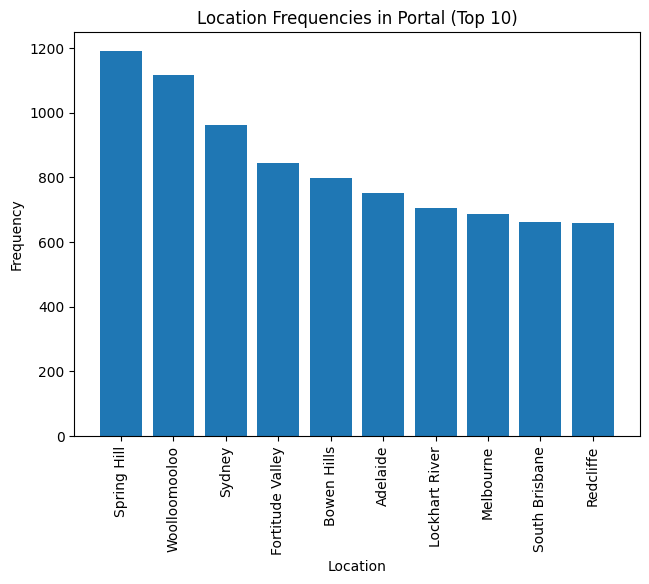

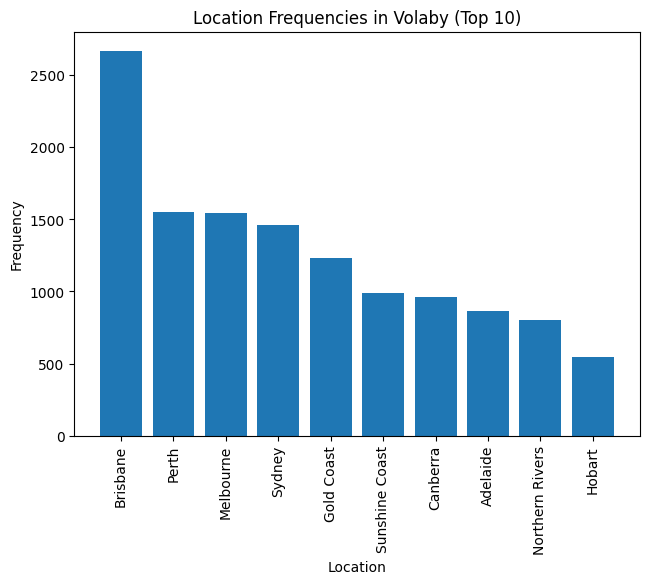

In [3]:
## Look at location frequencies
# portal
portal_suburb_freq = pd.DataFrame(df_portal['address_suburb'].value_counts())
portal_suburb_freq = portal_suburb_freq.reset_index()
portal_suburb_freq.columns = ['location', 'frequency']

portal_x = portal_suburb_freq['location'][:10]
portal_y = portal_suburb_freq['frequency'][:10]

plt.title("Location Frequencies in Portal (Top 10)")
plt.bar(portal_x, portal_y)
plt.tight_layout()
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()

# volaby
volaby_suburb_freq = pd.DataFrame(df_volaby['Program'].value_counts())
volaby_suburb_freq = volaby_suburb_freq.reset_index()
volaby_suburb_freq.columns = ['location', 'frequency']

volaby_x = volaby_suburb_freq['location'][:10]
volaby_y = volaby_suburb_freq['frequency'][:10]

plt.title("Location Frequencies in Volaby (Top 10)")
plt.bar(volaby_x, volaby_y)
plt.tight_layout()
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()









**Average Turnaway per location**

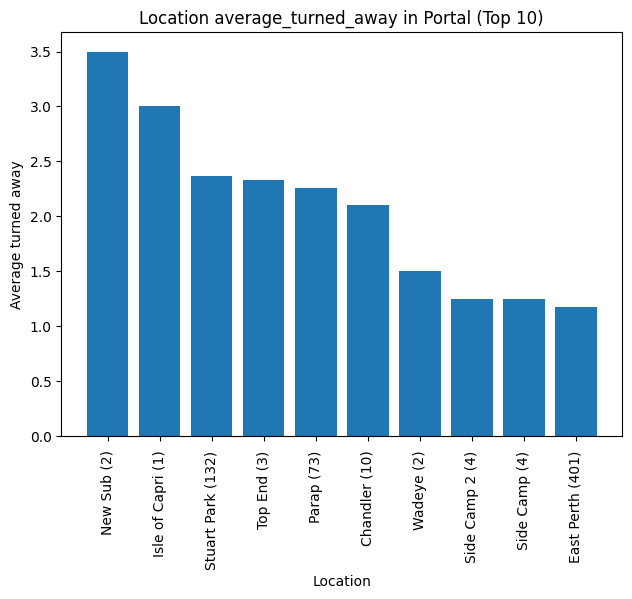

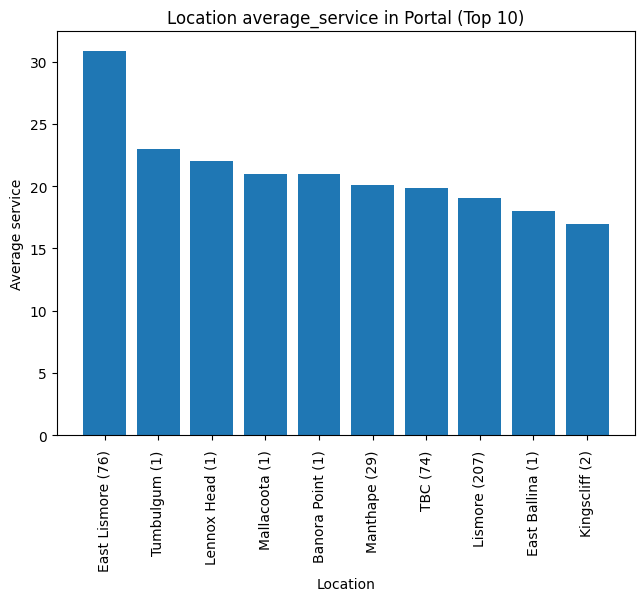

In [4]:
#portal_suburb_freq is being used


summed_by_address = df_portal.groupby('address_suburb').sum()[["turned_away","washes","showers"]]
summed_by_address['total_serviced'] = summed_by_address[["washes","showers"]].sum(axis=1)
summed_by_address = summed_by_address.reset_index()

#renaming
summed_by_address.columns = ['location', "turned_away","washes","showers",'total_serviced']

#sort
summed_by_address = summed_by_address.sort_values("location")
portal_suburb_freq = portal_suburb_freq.sort_values("location")

all = summed_by_address.merge(portal_suburb_freq, on="location")

all["average_service"] =  all["total_serviced"]/all["frequency"]
all["average_turned_away"] = all["turned_away"]/all["frequency"]

#plotting by average_turned_away
all = all.sort_values("average_turned_away", ascending=False)
x_tw = all['location'][:10] + " ("+ all['frequency'][:10].apply(str) + ") "
y_tw = all["average_turned_away"][:10] 


#plotting by average_service
all = all.sort_values("average_service", ascending=False)
x_as = all['location'][:10] + " ("+ all['frequency'][:10].apply(str) + ") "
y_as = all["average_service"][:10]




plt.title("Location average_turned_away in Portal (Top 10)")
plt.bar(x_tw, y_tw)
# plt.bar(x_tw, y_tw_as)
plt.tight_layout()
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Average turned away")
plt.show()

plt.title("Location average_service in Portal (Top 10)")
plt.bar(x_as, y_as)
plt.tight_layout()
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Average service")
plt.show()




<BarContainer object of 10 artists>
<BarContainer object of 10 artists>
<BarContainer object of 10 artists>
<BarContainer object of 10 artists>


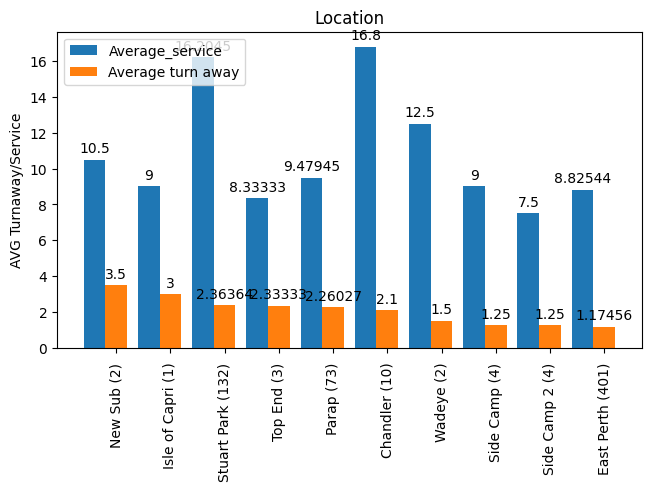

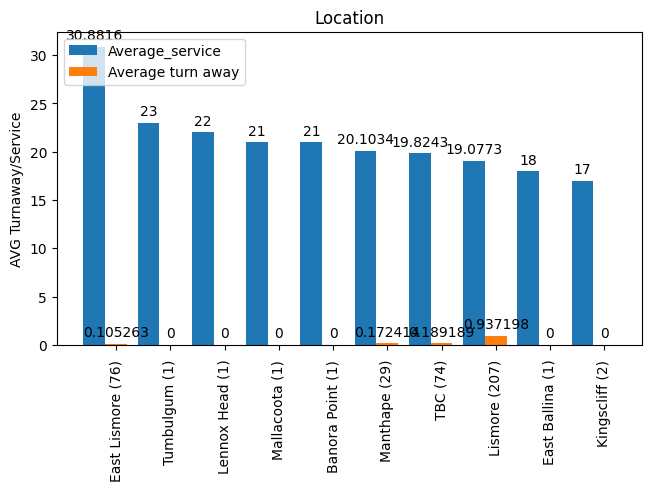

In [5]:

def plotGroup():
#grouped bar chart
    
    groups = {
        'Average_service': all["average_service"][:10],
        'Average turn away': all["average_turned_away"][:10]
    }

    fig, ax = plt.subplots(layout='constrained')
    x_tw = all['location'][:10] + " ("+ all['frequency'][:10].apply(str) + ") "


    width = 0.4  # the width of the bars
    multiplier = 0
    for attr, value in groups.items():
        offset = width * multiplier
        rects = ax.bar(np.arange(len(x_tw)) + offset, value, width, label=attr)
        print(rects)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('AVG Turnaway/Service')
    ax.set_title('Location')
    ax.set_xticks(np.arange(len(x_tw)) + width, x_tw,rotation=90)
    ax.legend(loc='upper left')

all = all.sort_values("average_turned_away", ascending=False)
plotGroup()
all = all.sort_values("average_service", ascending=False)
plotGroup()
# ax.set_ylim(0, 250)

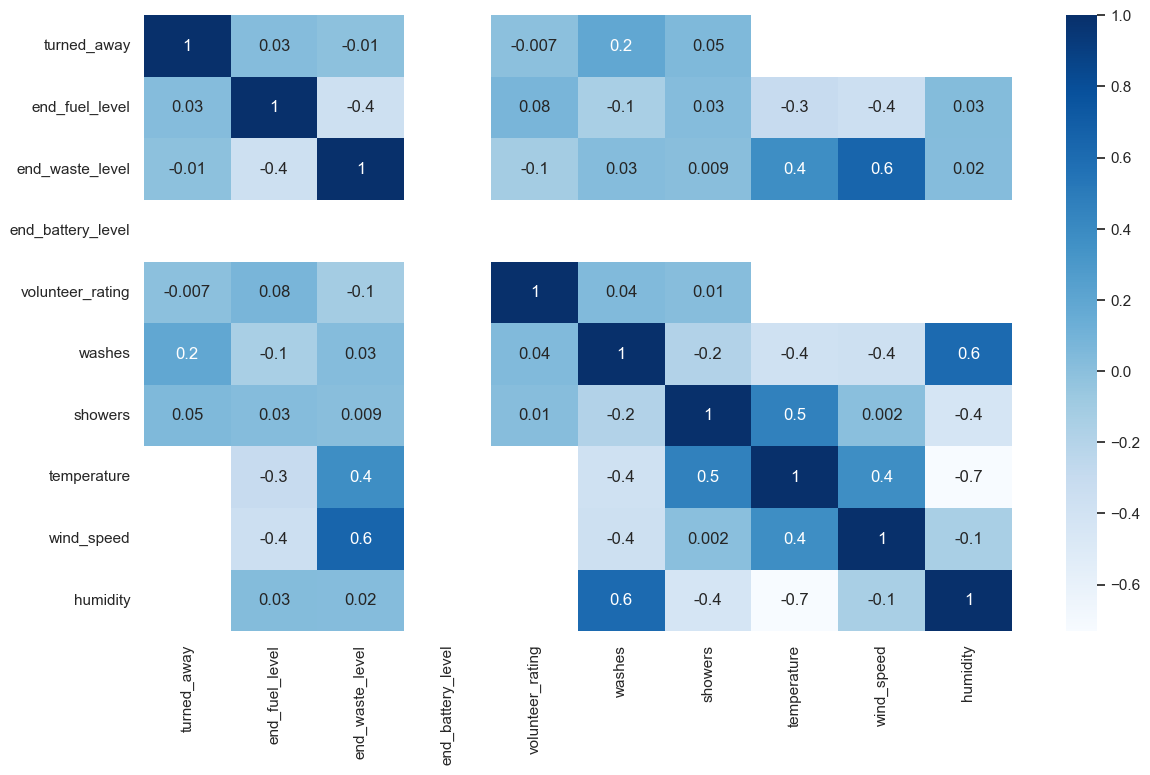

In [6]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
df_vals = df_portal[["turned_away","end_fuel_level","end_waste_level","end_battery_level","volunteer_rating","washes","showers","solar_conditions","temperature","wind_speed","humidity","weather"]]
corr = df_vals.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


# plt.figure(figsize=(14,8))
# sns.set_theme(style="white")

# corr = abs(df_portal.corr())
# heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


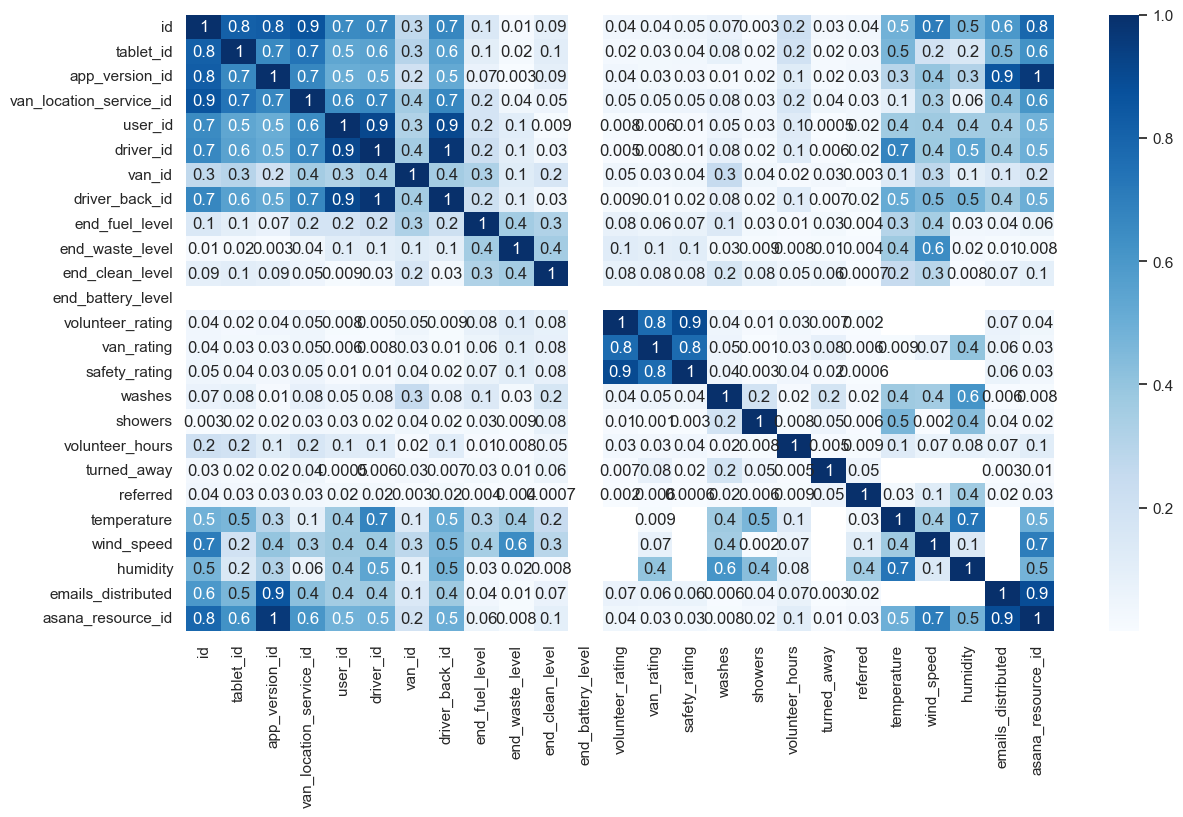

**Inspecting Turn Aways, Service Model, State**

In [8]:
# Same method as 'suburb frequencies' above except using 
# location names 'name.1' to find state and service model using 
# ancilliary tables
portal_loc_freq = pd.DataFrame(df_portal['name.1'].value_counts())
portal_loc_freq = portal_loc_freq.reset_index()
portal_loc_freq.columns = ['location', 'frequency']


df_location_sum = df_portal.groupby('name.1').sum()[["turned_away","washes","showers"]]

# getting total serviced
df_location_sum['total_serviced'] = df_location_sum[["washes","showers"]].sum(axis=1)
df_location_sum = df_location_sum.reset_index()

#renaming
df_location_sum.columns = ['location', "turned_away","washes","showers",'total_serviced']

#sort
df_location_sum = df_location_sum.sort_values("location")
portal_loc_freq = portal_loc_freq.sort_values("location")


## df_service_models contains info about location frequencies, country, state, service models
df_service_models = df_location_sum.merge(portal_loc_freq, on="location")

df_anc_services = pd.read_csv("./Data/Ancillary/Service_Locations_UNSW.csv")

df_service_models = df_service_models.merge(df_anc_services, left_on="location", right_on="Service Location")

display(df_service_models.head())




,location,turned_away,washes,showers,total_serviced,frequency,Service Location,Service Start Date,Country,State,Service Model,Service Location Status
0,Adelaide,955.0,14146.0,2.0,14148.0,2571,Adelaide,30/3/2016,AU,SA,Metro,Active Service Area
1,Aurukun,20.0,568.0,0.0,568.0,55,Aurukun,1/4/2022,AU,QLD,Remote,Active Service Area
2,Bidyadanga,9.0,1176.0,0.0,1176.0,100,Bidyadanga,12/10/2021,AU,WA,Remote,Active Service Area
3,Brisbane,607.0,16375.0,7774.0,24149.0,6056,Brisbane,10/10/2014,AU,QLD,Metro,Active Service Area
4,CRS East Gippsland Fires 2020,0.0,81.0,0.0,81.0,15,CRS East Gippsland Fires 2020,18/2/2020,AU,VIC,CRS,Inactive Service Area


<BarContainer object of 4 artists>
<BarContainer object of 4 artists>


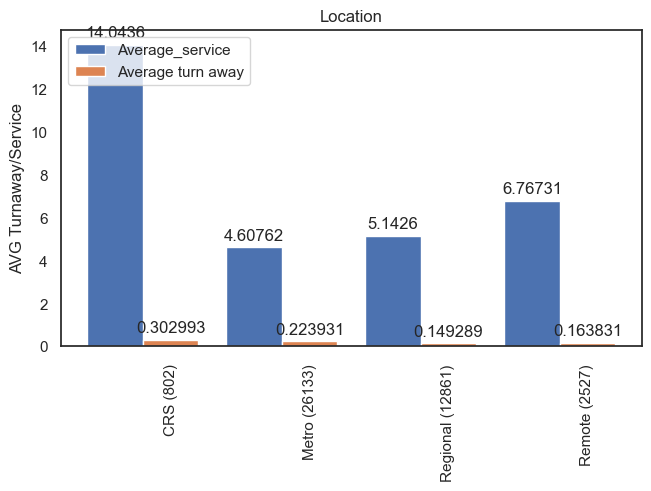

In [9]:
df_serv_model_sum = df_service_models.groupby('Service Model').sum()[["turned_away", "total_serviced", "frequency"]]

df_serv_model_sum = df_serv_model_sum.reset_index()
df_serv_model_sum.columns = ['service_model', 'turned_away', 'total_serviced', 'frequency']

df_serv_model_sum['avg_turnaway'] = df_serv_model_sum['turned_away']/df_serv_model_sum['frequency']
df_serv_model_sum['avg_serviced'] = df_serv_model_sum['total_serviced']/df_serv_model_sum['frequency']


groups = {
    'Average_service': df_serv_model_sum["avg_serviced"],
    'Average turn away': df_serv_model_sum["avg_turnaway"]
}

fig, ax = plt.subplots(layout='constrained')
x_tw = df_serv_model_sum['service_model'] + " ("+ df_serv_model_sum['frequency'].apply(str) + ") "


width = 0.4  # the width of the bars
multiplier = 0
for attr, value in groups.items():
    offset = width * multiplier
    rects = ax.bar(np.arange(len(x_tw)) + offset, value, width, label=attr)
    print(rects)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('AVG Turnaway/Service')
ax.set_title('Location')
ax.set_xticks(np.arange(len(x_tw)) + width, x_tw,rotation=90)
ax.legend(loc='upper left')
